In [1]:
#!/usr/bin/env python
%matplotlib inline  

#ipython magic to make ampmodule autoreload
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd
from scipy.stats import pearsonr,spearmanr

#pull in the classes to do the sims!
import AMPmodule

import resource
resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots

rez=600


In [3]:
#first, control trial

N=1000 #number of participants in each trial

#    def __init__(self, name, nps, tF, dose, clade, rfrac, A0, iv_phi, maxIC50, v_flg, keep_flg):

%time tr_ctl=AMPmodule.trial(name='ctl', nps=N, tF=560, dose=0, clade='all', rfrac=0.1, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=2)


CPU times: user 7min 58s, sys: 255 ms, total: 7min 58s
Wall time: 7min 58s


In [5]:
#now do sensitivity analyses for phi
nts=10 #number of sensitivity analyses variables
rfrac=np.linspace(0,1,nts)
sens=[]

counter=0
for ii in range(len(rfrac)):
    tr=AMPmodule.trial(name='ppt'+str(counter), nps=N, tF=560, dose=10, clade='bimodal', 
                       rfrac=rfrac[ii], A0=1, iv_phi=1, maxIC50=50, 
                           v_flg=False, keep_flg=0)
    sens.append(tr)
    counter+=1
    print(counter)



1
2
3
4
5
6
7
8
9
10


In [58]:
#do a bit more analysis for output variables

fpts=[]; fpis=[]
fpvls=[]; fpvls1=[]; fpvls2=[];
IC50s=[]; IC50s1=[]; IC50s2=[];

brks=np.zeros([nts])

for it in range(nts):    
    tr=sens[it]

    #total number of detected breakthroughs
    brks[it]=sum(tr.fp_vs>0)
    
    #first positive times and intervals
    fpts.append(tr.fp_ts[tr.fp_vs>0])
    fpis.append(1+np.floor(tr.fp_ts[tr.fp_ts>0]/7/4)%2)

    #first positive viral loads of breakthru infections
    fpvls.append(tr.fp_vs[tr.fp_vs>0])
    fpvls1.append(fpvls[it][fpis[it]==1])
    fpvls2.append(fpvls[it][fpis[it]==2])

    IC50s.append(tr.bt_ic50s[tr.fp_vs>0]/tr.iv_phi)
    IC50s1.append(IC50s[it][fpis[it]==1])
    IC50s2.append(IC50s[it][fpis[it]==2])
    
    

In [ ]:
#few extra things for plotting purposes
x=rfrac
fn='rfrac'
alz=0.3
dotcolz='sage'
xlimz=[-0.1,1.1]
xlabz='resistant fraction, $f$'
logx=False

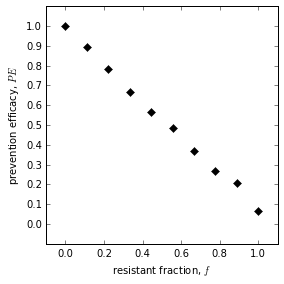

In [59]:
#prevention efficacy plots
plt.figure(figsize=(4,4),dpi=rez)

ctlbrks=sum(tr_ctl.fp_vs>0)
PE=1-brks/ctlbrks

plt.plot(x,PE,color='k',marker='D',ls='')

if logx:
    plt.semilogx()
plt.xlim(xlimz)
plt.ylim([-0.1,1.1])
plt.yticks(np.linspace(0,1,11))
plt.ylabel('prevention efficacy, $PE$')
plt.xlabel(xlabz)
plt.tight_layout()
plt.savefig('figures/PE_'+fn+'.pdf')


/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


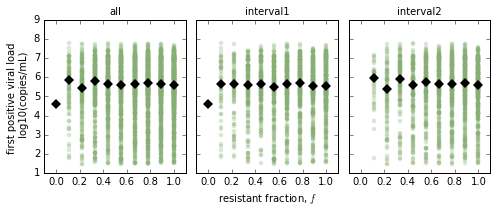

In [38]:
#first positive viral loads
fig,ax=plt.subplots(1,3,figsize=(7,3),dpi=rez,sharey=True,sharex=True)
for it in range(nts):    
    ax[0].scatter(np.ones(len(fpvls[it]))*x[it],np.log10(fpvls[it]),color=dotcolz,lw=0,alpha=alz)
    ax[0].scatter(x[it],np.median(np.log10(fpvls[it])),color='k',lw=0,marker='D',s=50)
    ax[1].scatter(np.ones(len(fpvls1[it]))*x[it],np.log10(fpvls1[it]),color=dotcolz,lw=0,alpha=alz)
    ax[1].scatter(x[it],np.median(np.log10(fpvls1[it])),color='k',lw=0,marker='D',s=50)
    ax[2].scatter(np.ones(len(fpvls2[it]))*x[it],np.log10(fpvls2[it]),color=dotcolz,lw=0,alpha=alz)
    ax[2].scatter(x[it],np.median(np.log10(fpvls2[it])),color='k',lw=0,marker='D',s=50)

ax[0].set_ylabel('first positive viral load \n log10(copies/mL)')
ax[1].set_xlabel(xlabz)

ax[0].set_title('all',fontsize=10)
ax[1].set_title('interval1',fontsize=10)
ax[2].set_title('interval2',fontsize=10)

if logx:
    plt.semilogx()
plt.xlim(xlimz)
plt.tight_layout()
plt.savefig('figures/fpvl_'+fn+'.pdf')


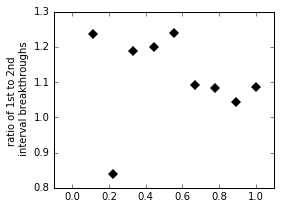

In [34]:
plt.figure(figsize=(4,3),dpi=rez)
#detection interval ratio

for it in range(nts):    
    plt.scatter(rfrac[it],np.sum(fpis[it]==1)/np.sum(fpis[it]==2),color='k',lw=0,marker='D',s=50)
plt.xlim(xlimz)
plt.ylabel('ratio of 1st to 2nd \n interval breakthroughs')
plt.xlabel(xlabz)

if logx:
    plt.semilogx()
plt.tight_layout()
plt.savefig('figures/ratio12'+fn+'.pdf')


/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


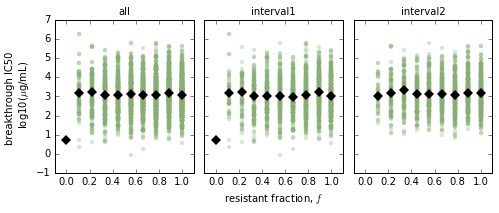

In [47]:
#breakthrough IC50s positive viral loads
med50=np.zeros([nts])

fig,ax=plt.subplots(1,3,figsize=(7,3),dpi=rez,sharey=True,sharex=True)
for it in range(nts):    
    ax[0].scatter(np.ones(len(IC50s[it]))*x[it],np.log10(IC50s[it]),color=dotcolz,lw=0,alpha=alz)
    ax[0].scatter(x[it],np.median(np.log10(IC50s[it])),color='k',lw=0,marker='D',s=50)
    ax[1].scatter(np.ones(len(IC50s1[it]))*x[it],np.log10(IC50s1[it]),color=dotcolz,lw=0,alpha=alz)
    ax[1].scatter(x[it],np.median(np.log10(IC50s1[it])),color='k',lw=0,marker='D',s=50)
    ax[2].scatter(np.ones(len(IC50s2[it]))*x[it],np.log10(IC50s2[it]),color=dotcolz,lw=0,alpha=alz)
    ax[2].scatter(x[it],np.median(np.log10(IC50s2[it])),color='k',lw=0,marker='D',s=50)

    med50[it]=np.median(np.log10(IC50s1[it]))
    
ax[0].set_ylabel('breakthrough IC50 \n log10($\mu$g/mL)')
ax[1].set_xlabel(xlabz)

ax[0].set_title('all',fontsize=10)
ax[1].set_title('interval1',fontsize=10)
ax[2].set_title('interval2',fontsize=10)

if logx:
    plt.semilogx()
plt.xlim(xlimz)
plt.tight_layout()
plt.savefig('figures/brkIC50'+fn+'.pdf')


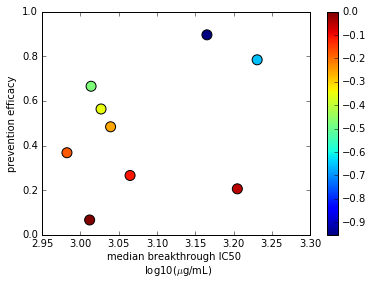

In [62]:
#plot mean IC50 and PE to get at resistant fraction

plt.scatter(med50,1-brks/ctlbrks,c=np.log10(x),s=100)
plt.colorbar()
plt.xlabel('median breakthrough IC50 \n log10($\mu$g/mL)')
plt.ylabel('prevention efficacy')



In [60]:
#You can use numpy.linalg.lstsq:

X = np.array([PE,med50])#keep adding vectors of "independent variables to regress against"

X = X.T # transpose so input vectors are along the rows
X = np.c_[X, np.ones(X.shape[0])] # add bias term
beta_hat = np.linalg.lstsq(X,x)[0]
print(beta_hat)

#Result:
#
#[ -0.49104607   0.83271938   0.0860167    0.1326091    6.85681762  22.98163883 -41.08437805 -19.08085066]
#You can see the estimated output with:

print(np.dot(X,beta_hat))
#Result:

#[ -5.97751163,  -5.06465759, -10.16873217,  -4.96959788,  -7.96356915,  -3.06176313,  -6.01818435,  -7.90878145,  -7.86720264]


[-1.09502771 -0.00454506  1.09306574]
[-0.00398179  0.09764128  0.21982119  0.35056168  0.46206677  0.54932127
  0.67690922  0.78809868  0.85294498  1.00661672]


In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, rfrac)

# display coefficients
print(regressor.coef_)

[-1.09502771 -0.00454506  0.        ]


/Users/danielreeves/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
